In [1]:
from sklearn import tree
from dtreeviz.trees import *
from sklearn.datasets import load_boston

boston = load_boston()

X_train = boston.data
y_train = boston.target
testX = X_train[5,:]

regr = tree.DecisionTreeRegressor(max_depth=3)
regr = regr.fit(X_train, y_train)

viz = dtreeviz(regr, X_train, y_train, target_name='price',
               feature_names=boston.feature_names,
               X = testX)
viz

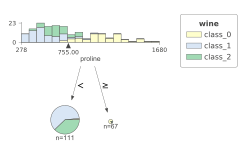

In [2]:
from sklearn.datasets import load_wine

clf = tree.DecisionTreeClassifier(max_depth=1)
wine = load_wine()

clf.fit(wine.data, wine.target)

testX = wine.data[np.random.randint(0, len(wine.data)),:]
testX=None

viz = dtreeviz(clf, wine.data, wine.target, target_name='wine',
              feature_names=wine.feature_names,
              class_names=list(wine.target_names),
              X=testX)
viz

# Single-var regression

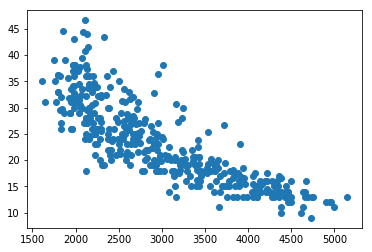

In [3]:
import pandas as pd

df_cars = pd.read_csv("data/cars.csv")
X = df_cars[['WGT']]
y = df_cars['MPG']

plt.scatter(X,y,marker='o')

In [7]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X,y)
lm.score(X,y)

0.6926304310167517

In [19]:
t = tree.DecisionTreeRegressor(max_depth=2)
t.fit(X,y)
t.score(X,y)

0.7096817718275213

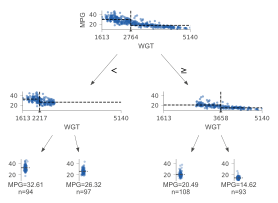

In [21]:
viz = dtreeviz(t, X, y, target_name='MPG', feature_names=['WGT'])
viz

In [72]:
shadow_tree = ShadowDecTree(t, X, y, feature_names=['WGT'])
splits = []
for node in shadow_tree.internal:
    splits.append( node.split() )
splits = sorted(splits)

In [73]:
wgt = X.WGT
means = []
for split in splits:
    means.append( np.mean(y[wgt<split]) )
means.append( np.mean(y[wgt>=splits[-1]]) )
means

[32.61382956382979, 29.41989521989529, 26.192642127090302, 14.615053774193548]

In [74]:
splits

[2217.0, 2764.5, 3657.5]

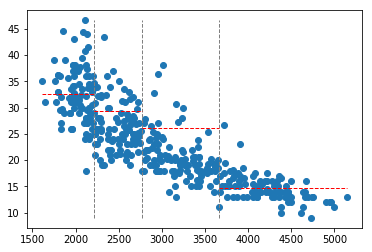

In [76]:
y_range = (min(y), max(y)) # same y axis for all
overall_feature_range = (np.min(X.values), np.max(X.values))

plt.scatter(X,y,marker='o')
for split in splits:
    left, right = node.split_samples()
    left = y[left]
    right = y[right]
    plt.plot([split,split],[*y_range],'--', color='grey', linewidth=1)

prevX = overall_feature_range[0]
for i,m in enumerate(means):
    split = overall_feature_range[1]
    if i<len(splits):
        split = splits[i]        
    plt.plot([prevX,split],[m,m],'--', color='red', linewidth=1)
    prevX = split